In [1]:
import os
import seaborn as sns
import warnings

import matplotlib.pyplot as plt
import scripts
from scripts.data_handler import HTRU2DataHandler
from scripts.config import DataConfig

In [2]:
def compute_correlation_matrix(df, numerical):
    """Compute and plot the correlation matrix for numerical features."""
    corr = df[numerical].corr()

    sns.heatmap(corr, annot=True, fmt=".2f")

    # Print the max correlation values
    print("Maximum correlation values:")
    for col in corr.columns:
        max_corr = corr[col][corr[col] != 1.0].max()
        print(f"{col}: {max_corr:.2f}")


In [3]:
# Data handler initialization
cfg = DataConfig()
data_handler = HTRU2DataHandler(cfg)

In [4]:
if len(os.listdir(cfg.data_dir)) == 1:
    data_handler.download_kaggle()
else:
    print("Data already downloaded.")

df = data_handler.load()

Data already downloaded.


In [5]:
df = data_handler.preprocess()

In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.head()

,ip_mean,ip_std,ip_kurtosis,ip_skewness,dm_mean,dm_std,dm_kurtosis,dm_skewness,signal
0,140.562,55.684,-0.235,-0.700,3.200,19.110,7.976,74.242,0
1,102.508,58.882,0.465,-0.515,1.677,14.860,10.576,127.394,0
2,103.016,39.342,0.323,1.051,3.121,21.745,7.736,63.172,0
3,136.750,57.178,-0.068,-0.636,3.643,20.959,6.896,53.594,0
4,88.727,40.672,0.601,1.123,1.179,11.469,14.270,252.567,0


In [8]:
features = df.columns[(df.columns != "signal")].tolist()
numerical_cols = df[features].select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical columns:", numerical_cols)

Numerical columns: ['ip_mean', 'ip_std', 'ip_kurtosis', 'ip_skewness', 'dm_mean', 'dm_std', 'dm_kurtosis', 'dm_skewness']


Maximum correlation values:
ip_mean: 0.55
ip_std: 0.55
ip_kurtosis: 0.95
ip_skewness: 0.95
dm_mean: 0.80
dm_std: 0.80
dm_kurtosis: 0.92
dm_skewness: 0.92
signal: 0.79


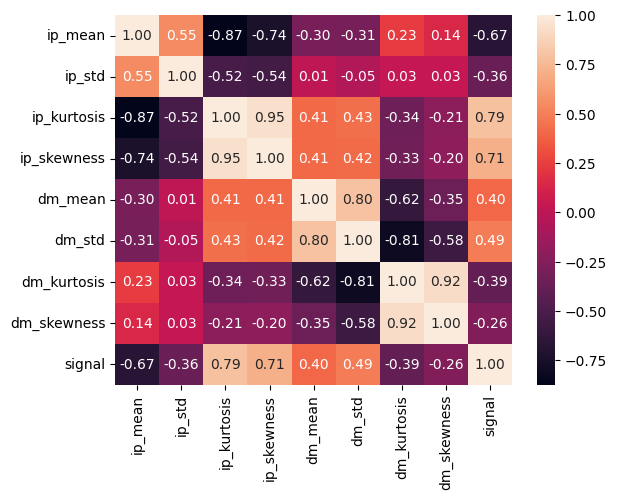

In [9]:
compute_correlation_matrix(df, df.columns.tolist())

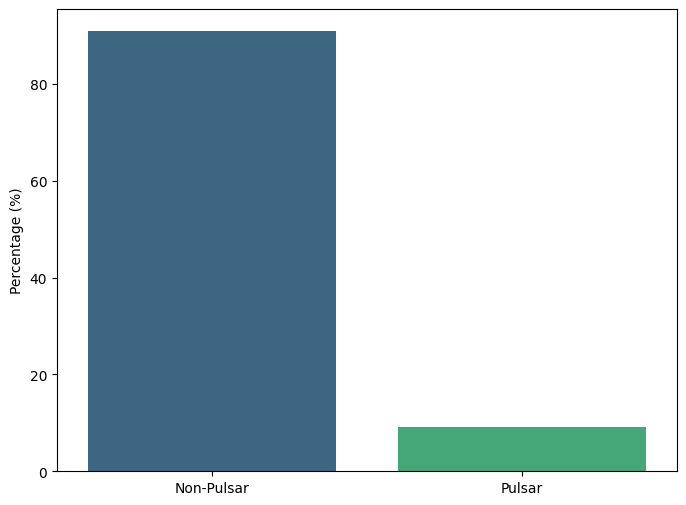

In [10]:
# Plot target distribution

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.countplot(x='signal', data=df, stat="percent", ax=ax, palette="viridis")
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('')
    ax.xaxis.set_ticklabels(['Non-Pulsar', 'Pulsar'])
    plt.show();

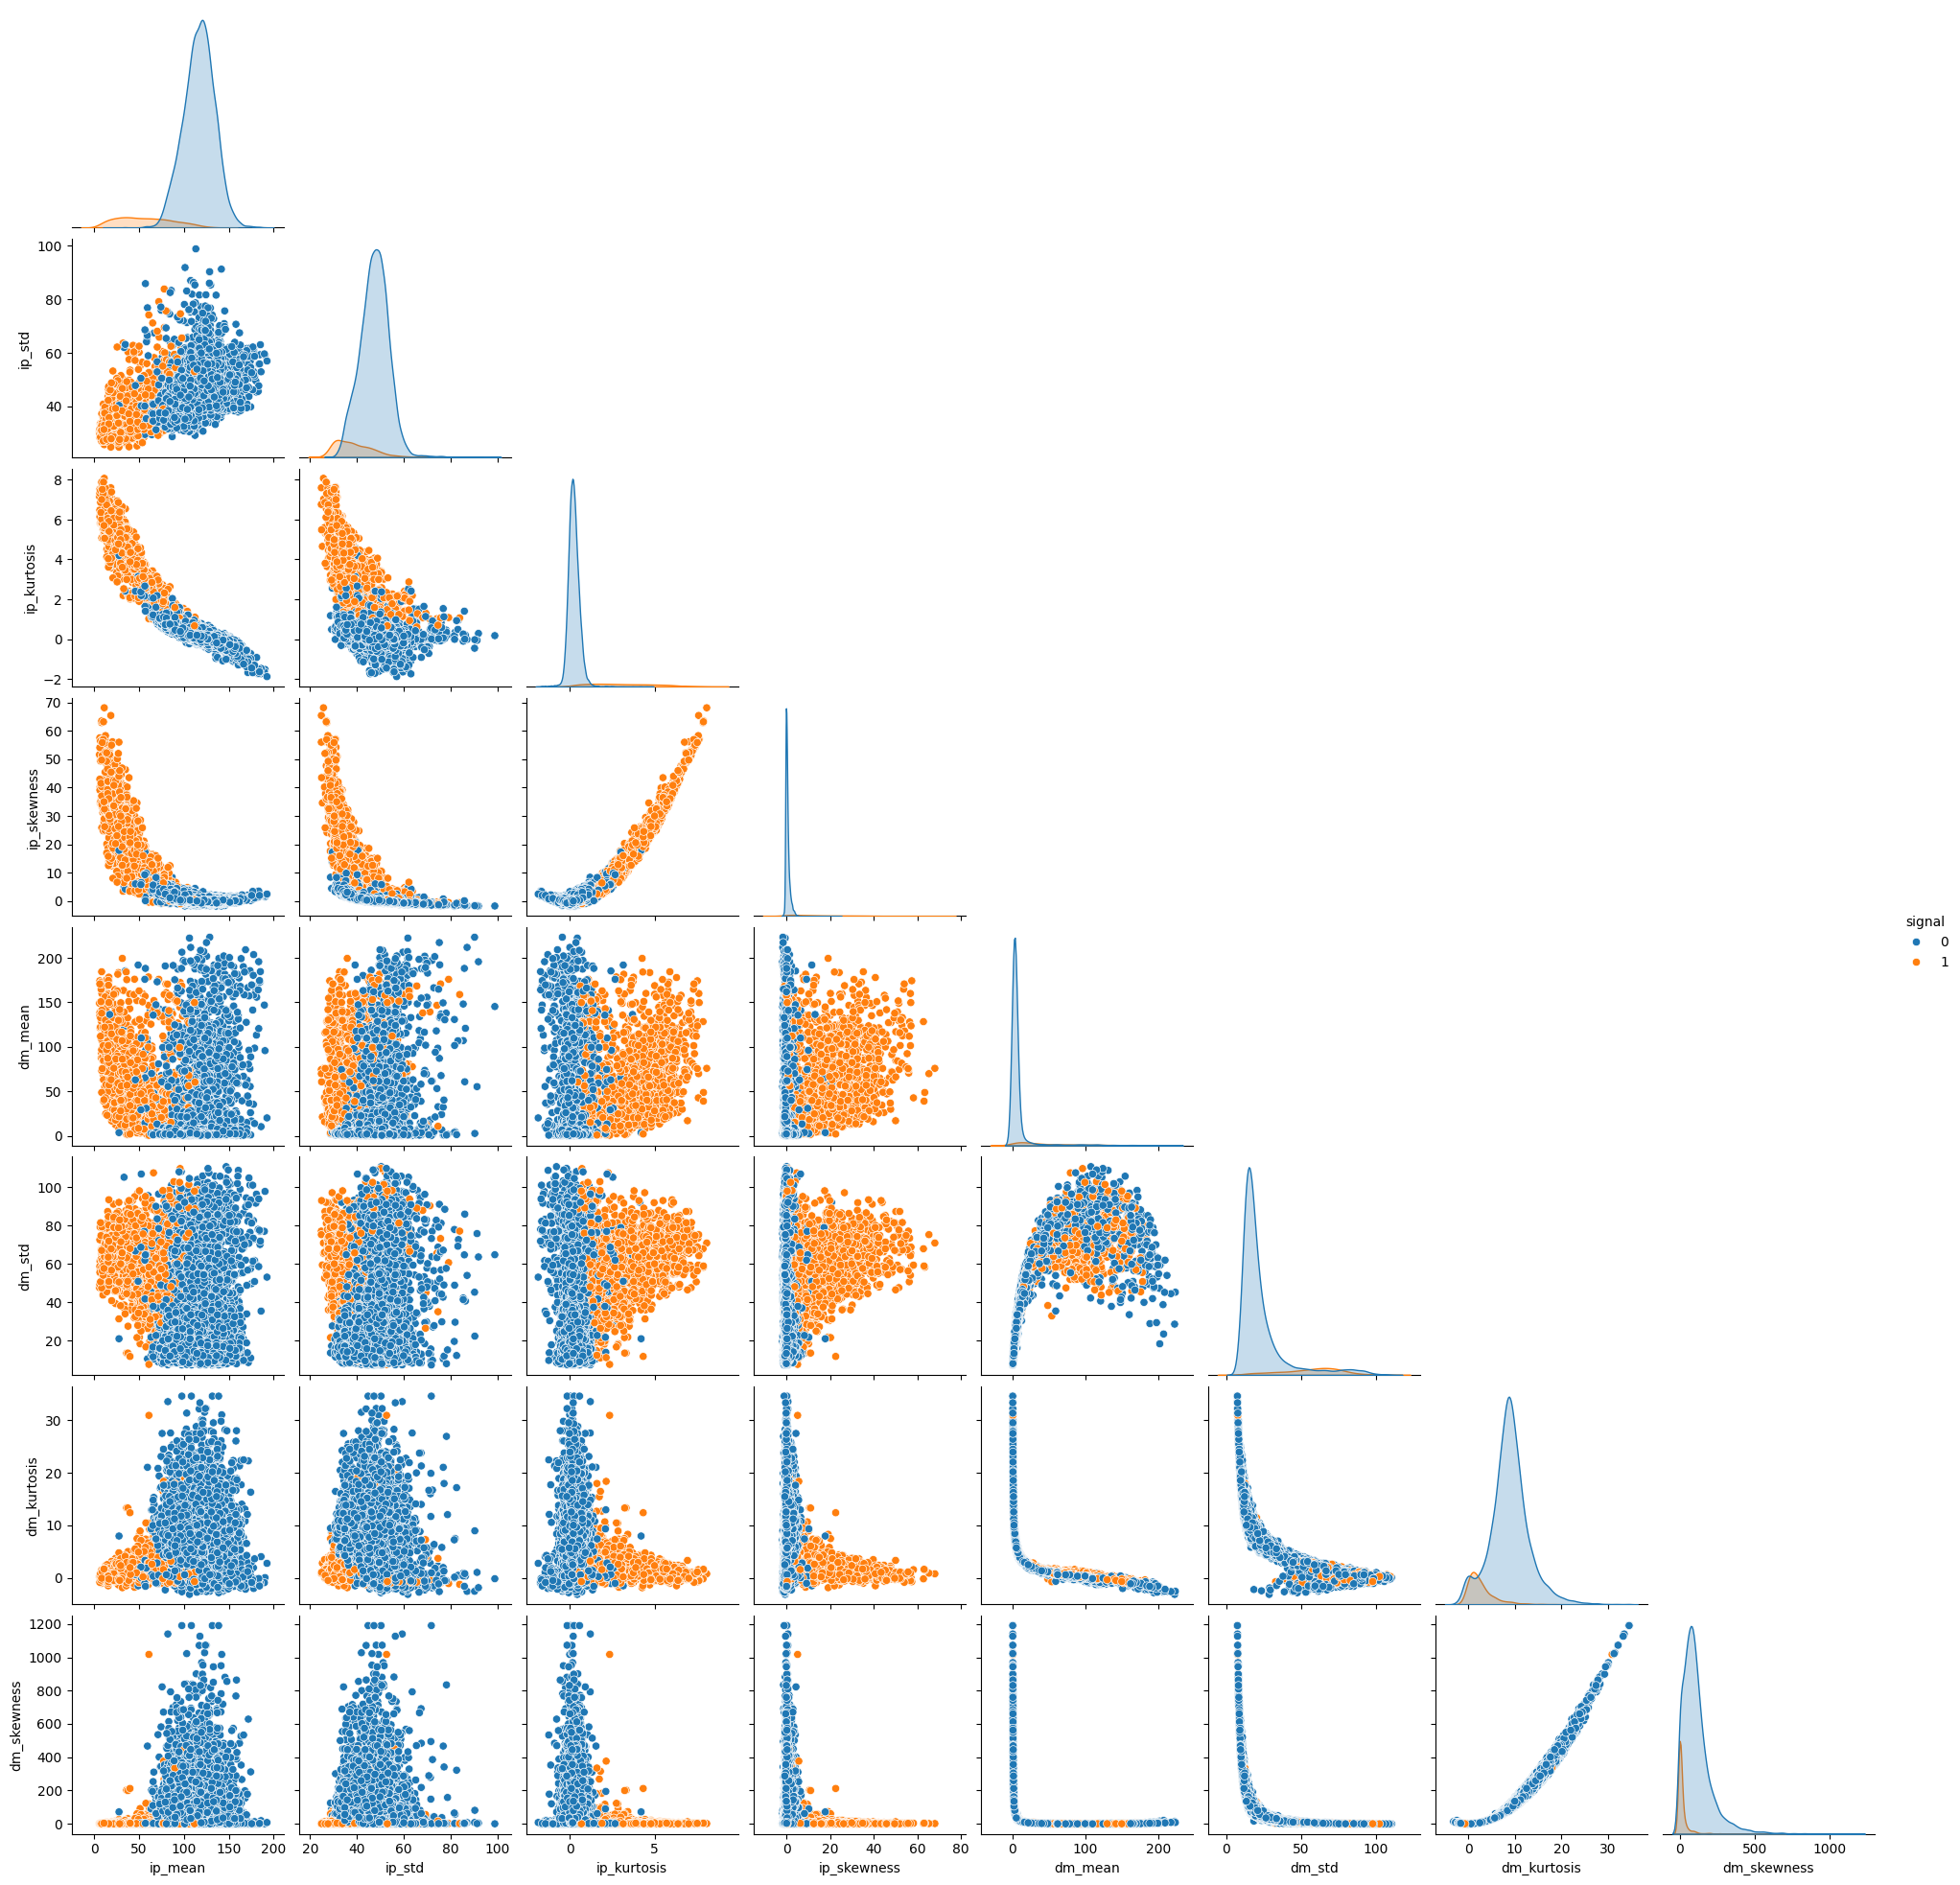

In [11]:
# Pair plots of the numerical columns with signal indicator
sns.pairplot(df, hue='signal', corner=True)